<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  - 1st year</h3></center>
<hr>
<center><h1>Numerical Optimization</h1></center>
<center><h2>Lab 9: Optimizing Neural Networks </h2></center>


---


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
from notimportant import *
dtype=torch.float32
%matplotlib inline
from IPython import display

import torchvision
import torch

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST('dataset/', train=True, download=True, transform=image_transform)
test_dataset = torchvision.datasets.MNIST('dataset/', train=False, download=True, transform=image_transform)


---

In this lab, we will investigate numerical optimization techniques through practical experimentation on a very simple classification problem. Utilizing PyTorch, you will manipulate parameters such as the number of neurons, optimizer selection, learning rate, and network architecture. In the second part we'll train a more intricate model to learn the MNIST dataset.

# First part: 2-D points classification

By default, we consider 100 points, each belonging to the class <span style="color:blue">**blue**</span> (<span style="color:blue">-1</span>) or <span style="color:red">**red**</span> (<span style="color:red">1</span>).

The goal is to write a model that will output the class (<span style="color:blue">blue</span>/<span style="color:red">red</span>) when given a 2D point as input.


## First data set: Two crescents

100 points in 2-D, closeness = -0.3
data's shape: torch.Size([2, 100])
label's shape:torch.Size([1, 100])
Both are <class 'torch.Tensor'>


Text(0.5, 1.0, 'Two Crescent Dataset')

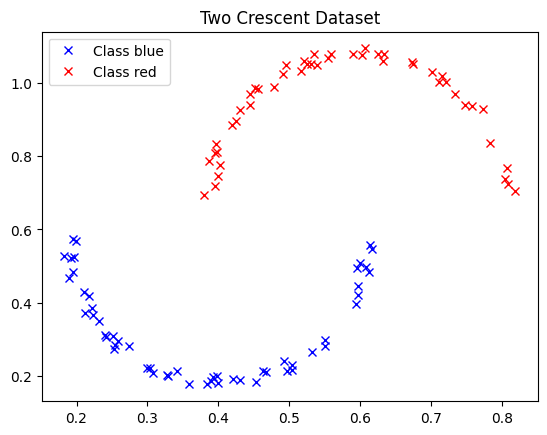

In [2]:
n = 100
closeness = 0.7 # 
closeness = -0.3 # easy task : linearly separable

X, Y = crescents_dataset(n, closeness=closeness)
d, n = X.shape
print(f"{n} points in 2-D, closeness = {closeness}")
print(f"data's shape: {X.shape}\nlabel's shape:{Y.shape}")
print(f"Both are {type(X)}")

plt.plot(X[0, Y.flatten() > 0], X[1, Y.flatten() > 0], 'bx', label='Class blue')
plt.plot(X[0, Y.flatten() < 0], X[1, Y.flatten() < 0], 'rx', label='Class red')

# Add legend and title
plt.legend()
plt.title("Two Crescent Dataset")

## One hidden layer neural network with ReLU activations

### Model and hyperparameters definition

In [3]:
import torch.nn as nn

# number of neurons
m = 5

model = nn.Sequential(
      nn.Linear(d, m),
      nn.ReLU(),
      nn.Linear(m, 1),
)
losslist = [] # store each iteration's loss
loss_fn = nn.SoftMarginLoss() # https://pytorch.org/docs/stable/nn.html#loss-functions
# try MSELoss ?


# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
model # show what the resulting model is

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)

## Training loop

Everything is done automatically now, just need to call the right functions.
Important lines are commented.

In [4]:
def trainloop(seconds=2, secbetweenimage=1, show=True):
    start, lastimage = time.time(), 0
    i = 0
    losslist = []
    while time.time()-start <= seconds:
        i += 1

        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(X.T)

        # Compute and print loss.
        loss = loss_fn(y_pred, Y.T)
        losslist.append(loss.item())


        if time.time() - lastimage > secbetweenimage:
            if show:
                showoutput(model, X, Y, i, loss.item(), discretize=False)
            else:
                print(f"iteration {i} loss={loss.item():.4f}")
            lastimage = time.time()


        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()
    
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
    
        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step() # simplified: W = W - grad_F (W)
    if not show:
        print(f"iteration {i} loss={loss.item():.4f}")
        return losslist
    display.clear_output(wait=True)
    plt.show()
    showoutput(model, X, Y, i, loss.item(), discretize=False)
    display.clear_output(wait=True)
    return losslist



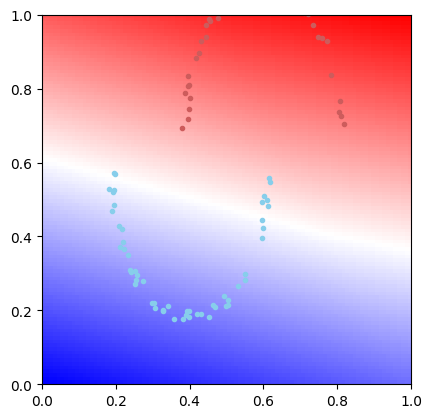

In [5]:
# this will run the training for two seconds, and show update every one second.
# feel free to adjust
losslist.extend(trainloop(seconds=2, secbetweenimage=1, show=True))

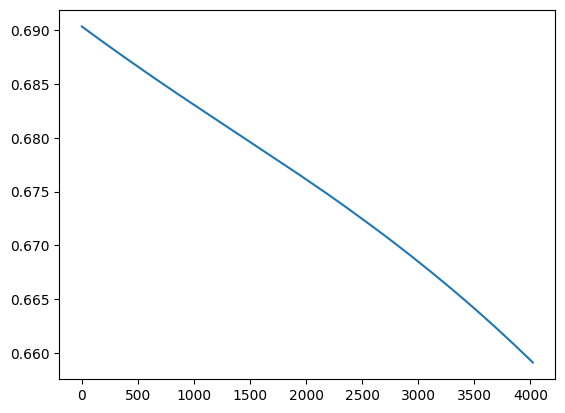

In [6]:
plt.plot(losslist)

## Visualizing a single neuron's output

Visualizing output of neuron n°3 out of 5 neurons


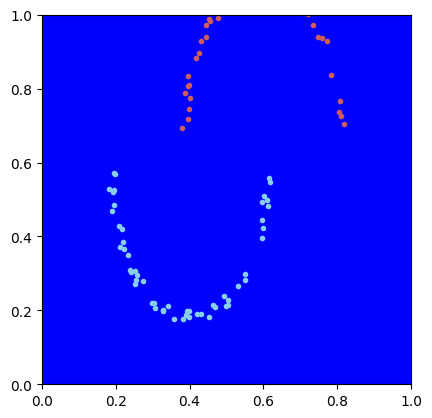

In [7]:
# take a copy of the model and set every neuron to zero except num_neuron.
num_neuron = 3
print(f"Visualizing output of neuron n°{num_neuron} out of {model[0].weight.shape[0]} neurons")

import copy
mod = copy.deepcopy(model)
with torch.no_grad():
    num_neuron -= 1
    mod[0].weight[num_neuron+1:] = 0
    mod[0].bias[num_neuron+1:] = 0
    mod[0].weight[:num_neuron] = 0
    mod[0].bias[:num_neuron] = 0

showoutput(mod, X, Y, once=True, discretize=False)


## Task 1: Tune the network

- change the optimiser (currently : vanilla gradient descent)
- tune the learning rate (currently : too low)
- change the loss function
- add more neurons !
- change the activation function
- add more layers ?
- (bit more complex) add a learning rate scheduler

## Task 2: Change the dataset

- increase or decrease the number of samples ($n=100$ by default)
- make the data more or less linear ($closeness=0.7$ be default)
- Try a random dataset

# MNIST

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
from notimportant import *
dtype=torch.float32
%matplotlib inline
from IPython import display

import torch
import torchvision


In [9]:

## Create dataloader, in PyTorch, we feed the trainer data with use of dataloader
## We create dataloader with dataset from torchvision, 
## and we dont have to download it seperately, all automatically done

# Define batch size, batch size is how much data you feed for training in one iteration
batch_size_train = 32 # We use a small batch size here for training
batch_size_test = 1024 #

# define how image transformed
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
#image datasets
train_dataset = torchvision.datasets.MNIST('dataset/', 
                                           train=True, 
                                           download=True,
                                           transform=image_transform)
test_dataset = torchvision.datasets.MNIST('dataset/', 
                                          train=False, 
                                          download=True,
                                          transform=image_transform)
#data loaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test, 
                                          shuffle=True)

> How many samples are in the dataset?

In [10]:
# print number of elements in train_dataset, test_dataset



(Truth) Class : 0


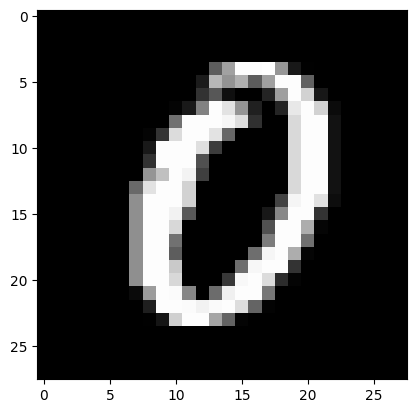

In [11]:
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print(f"(Truth) Class : {labels[0].item()}")

> What is the dimension of a single sample?

In [12]:
import torch.nn.functional as F

hiddenlayer_neurons = 30

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define convolutional layers
        self.conv_layers = nn.Sequential(
            # Convolutional layer
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
            nn.ReLU(),
            # Max pooling layer with kernel size 2x2
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5),
            nn.ReLU(),
            #nn.Dropout2d(),
            nn.MaxPool2d(kernel_size=2)
        )
        # Define fully connected layers
        self.fc_layers = nn.Sequential(
            # Fully connected layer with 320 input features and m output features
            nn.Linear(320, m),
            nn.ReLU(),
            #nn.Dropout(),
            # Fully connected layer with m input features and 10 output features, the 10 classes.
            nn.Linear(m, 10)
        )

    def forward(self, x):
        # Forward pass through convolutional layers
        # goes from 28x28 to 320
        x = self.conv_layers(x)
        # Flatten the output for fully connected layers
        x = x.view(-1, 320)
        # Forward pass through fully connected layers
        x = self.fc_layers(x)
        # Apply log softmax for output
        return F.log_softmax(x, dim=1)



In [13]:
# Create an instance of the CNN model
cnn_model = CNN() # using cpu here
timestamp, trainlosslist, testlosslist = [], [], []
elapsed = 0
# show summary
cnn_model

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=320, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=10, bias=True)
  )
)

## Output random sample, and test model

Of course it gives a completely random guess, we haven't trained it yet!

(Truth) Class: 7
(Guess) Class:
0 : 8.18252%
1 : 9.31932%
2 : 11.69199%
3 : 10.43758%
4 : 9.11169%
5 : 9.56084%
6 : 10.97956%
7 : 9.42916%
8 : 11.54395%
9 : 9.74339%


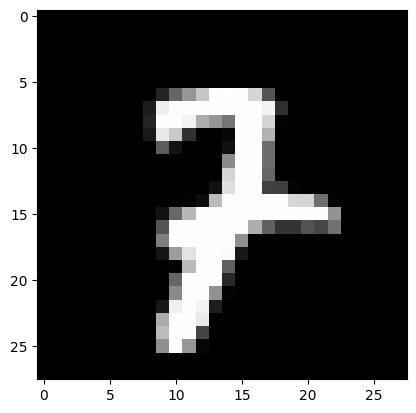

In [14]:
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print(f"(Truth) Class: {labels[0].item()}")
with torch.no_grad():
    out = cnn_model(example_datas)[0].numpy()
print("(Guess) Class:")
for i, p in enumerate(out):
    print(f"{i} : {np.exp(p)*100:.5f}%")

In [15]:
learning_rate = 1e-3
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=learning_rate) # example optimiser, feel free to change
loss_fn = F.nll_loss

In [16]:
print("Test set accuracy")
test(cnn_model, loss_fn=loss_fn, loader=test_loader, load=0.5) # test 25% of the test data set
# before training, we expect 1/10 % accuracy, i.e. random guesses.

Test set accuracy
Average loss: 2.3124, Correct/Tested: 520/5120 (10%)


2.3123501777648925

## Train the model on the whole dataset, minibatch by minibatch

In [17]:
def train2(seconds=2, fromwhere=0):
    timestamp, trainlosslist, testlosslist = [], [], []
    model.train()
    batch_size = train_loader.batch_size
    i = 0
    n = len(train_loader.dataset)
    samplerate, lastsample = 1, 0
    start = time.time()
    lastloss=1

    for data, target in train_loader:
        optimizer.zero_grad()
        output = cnn_model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        timestamp.append(time.time()-start+elapsed)
        trainlosslist.append(loss.item())
        if time.time() - lastsample > samplerate:
            testlosslist.append(test(cnn_model, loss_fn=loss_fn, loader=test_loader, load=0.05, noprint=True))
            model.train()
            print(".", end="", flush=True)
            lastsample = time.time()
            lastloss=testlosslist[-1]
        else:
            testlosslist.append(lastloss)
        i += batch_size
            
        if time.time() - start > seconds:
            break
    print(f" trained on {i} samples, loss = {loss.item()}")
    return timestamp, trainlosslist, testlosslist, time.time() - start

.... trained on 8160 samples, loss = 2.2760303020477295
Average loss: 2.2686, Correct/Tested: 135/1024 (13%)


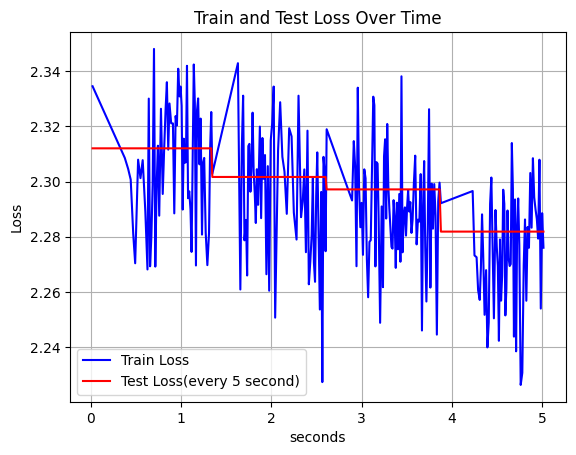

In [18]:

a,b,c, e = train2(seconds=5, fromwhere=elapsed) # train for 20 seconds
timestamp.extend(a)
trainlosslist.extend(b)
testlosslist.extend(c)
elapsed += e
test(cnn_model, loss_fn=loss_fn, loader=test_loader, load=0.1) # test 100% of the test data set
ts = time.time() - np.array(timestamp)
plt.plot(timestamp, trainlosslist, label='Train Loss', color='blue')
plt.plot(timestamp, testlosslist, label='Test Loss(every 5 second)', color='red')
plt.xlabel('seconds')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating the model on a single example

(Truth) Class: 7
(Guess) Class:
0 : 8.45309%
1 : 9.12813%
2 : 11.41779%
3 : 12.20033%
4 : 9.06049%
5 : 8.87856%
6 : 10.33064%
7 : 9.98600%
8 : 11.80554%
9 : 8.73946%


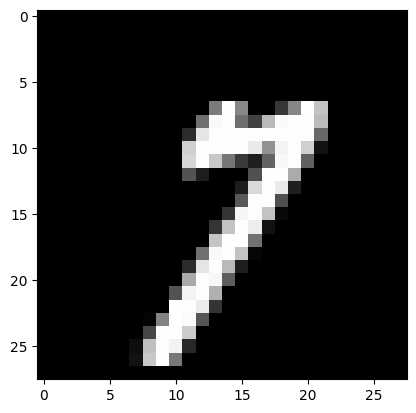

In [19]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print(f"(Truth) Class: {labels[0].item()}")
with torch.no_grad():
    out = cnn_model(example_datas)[0].numpy()
print("(Guess) Class:")
for i, p in enumerate(out):
    print(f"{i} : {np.exp(p)*100:.5f}%")

## Accuracy on the whole test dataset

In [ ]:
test(cnn_model, loss_fn=loss_fn, loader=test_loader, load=1) # test 100% of the test data set


## Task 3: Reduce the training time by reducing the network's size, layers.

How much accuracy can you keep?

- use different optimiser (momentum?)
- different learning rates, (scheduler) [pytorch doc](https://pytorch.org/docs/stable/optim.html)
- change batchsize
- add regularizer? (weight decay)
- change activation functions
- convolution filter sizes

# Links

- first part inspired by the [numerical tour](https://www.numerical-tours.com/python/)